#### El objetivo es utilizar ML para predecir si una orden o pedido realizado por un cliente en la tienda Olist (Brasil) llegará en la fecha estipulada por el vendedor. A su vez, establecer los principales drivers que explican que un pediddo llegue tarde y las posibles acciones comerciales. 


In [489]:

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import make_scorer, roc_auc_score, recall_score, accuracy_score
from sklearn import decomposition, datasets
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [490]:
customers=pd.read_csv("../TP4/customers.csv")
geo=pd.read_csv("../TP4/geolocation.csv")
items=pd.read_csv("../TP4/items.csv")
payments=pd.read_csv("../TP4/payments.csv")
reviews=pd.read_csv("../TP4/reviews.csv")
products=pd.read_csv("../TP4/products.csv")
sellers=pd.read_csv("../TP4/sellers.csv")
orders=pd.read_csv("../TP4/orders.csv")

In [491]:
geo.shape

(1000163, 5)

In [492]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [493]:
items.shape

(112650, 7)

In [494]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [495]:
payments.shape

(103886, 5)

In [496]:
payments.head() 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [497]:
reviews.size

700000

In [498]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [499]:
products.size

296559

In [500]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [501]:
sellers.size

12380

In [502]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [503]:
orders.size

795528

In [504]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [505]:
payments_orders=pd.merge(payments, orders, how='inner', on=['order_id']) #join de payments y orders en order_id
payments_orders.size

1246632

In [506]:
payments_orders.isnull().sum() *100/ len(payments_orders)

order_id                         0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.168454
order_delivered_carrier_date     1.817377
order_delivered_customer_date    3.014843
order_estimated_delivery_date    0.000000
dtype: float64

In [507]:
products_items=pd.merge(products, items, how="right", on=["product_id"])

In [508]:
products_items.isnull().sum() * 100 / len(products_items)

product_id                    0.000000
product_category_name         1.422992
product_name_lenght           1.422992
product_description_lenght    1.422992
product_photos_qty            1.422992
product_weight_g              0.015979
product_length_cm             0.015979
product_height_cm             0.015979
product_width_cm              0.015979
order_id                      0.000000
order_item_id                 0.000000
seller_id                     0.000000
shipping_limit_date           0.000000
price                         0.000000
freight_value                 0.000000
dtype: float64

In [509]:
sellers_items=pd.merge(sellers, items, how="left", on=["seller_id"])

In [510]:
sellers_items.isnull().sum() *100/ len(sellers_items)

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
order_id                  0.0
order_item_id             0.0
product_id                0.0
shipping_limit_date       0.0
price                     0.0
freight_value             0.0
dtype: float64

In [511]:
customers_orders=pd.merge(customers, orders, how="right", on=["customer_id"])

In [512]:
customers_orders.isnull().sum()*100/len(customers_orders)

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [513]:
reviews_orders=pd.merge(reviews, orders, how="right", on=["order_id"])

In [514]:
reviews_orders.isnull().sum()*100/len(reviews_orders)

review_id                         0.000
order_id                          0.000
review_score                      0.000
review_comment_title             88.285
review_comment_message           58.247
review_creation_date              0.000
review_answer_timestamp           0.000
customer_id                       0.000
order_status                      0.000
order_purchase_timestamp          0.000
order_approved_at                 0.161
order_delivered_carrier_date      1.793
order_delivered_customer_date     2.987
order_estimated_delivery_date     0.000
dtype: float64

In [515]:
reviews_orders.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [516]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [517]:
orders_items=pd.merge(orders, items, how="left", on=["order_id"])

In [518]:
orders_items.isnull().sum()*100/len(orders_items)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.141944
order_delivered_carrier_date     1.735067
order_delivered_customer_date    2.846815
order_estimated_delivery_date    0.000000
order_item_id                    0.683271
product_id                       0.683271
seller_id                        0.683271
shipping_limit_date              0.683271
price                            0.683271
freight_value                    0.683271
dtype: float64

In [519]:
join=pd.merge(payments_orders, products_items, how="inner", on=["order_id"])

In [520]:
join.isnull().sum()*100/len(join)

order_id                         0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012755
order_delivered_carrier_date     1.058664
order_delivered_customer_date    2.182805
order_estimated_delivery_date    0.000000
product_id                       0.000000
product_category_name            1.443865
product_name_lenght              1.443865
product_description_lenght       1.443865
product_photos_qty               1.443865
product_weight_g                 0.017007
product_length_cm                0.017007
product_height_cm                0.017007
product_width_cm                 0.017007
order_item_id                    0.000000
seller_id                        0.000000
shipping_limit_date              0

In [521]:
join2=pd.merge(sellers_items, customers_orders, how="inner", on=["order_id"])
join2.isnull().sum()*100/len(join2)

seller_id                        0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.013316
order_delivered_carrier_date     1.059920
order_delivered_customer_date    2.178429
order_estimated_delivery_date    0.000000
dtype: float64

In [522]:
join3=pd.merge(join, join2, how="inner", on=["order_id"])
join3.isnull().sum()*100/len(join3)

order_id                           0.000000
payment_sequential                 0.000000
payment_type                       0.000000
payment_installments               0.000000
payment_value                      0.000000
customer_id_x                      0.000000
order_status_x                     0.000000
order_purchase_timestamp_x         0.000000
order_approved_at_x                0.010386
order_delivered_carrier_date_x     1.173653
order_delivered_customer_date_x    2.114530
order_estimated_delivery_date_x    0.000000
product_id_x                       0.000000
product_category_name              1.391155
product_name_lenght                1.391155
product_description_lenght         1.391155
product_photos_qty                 1.391155
product_weight_g                   0.014663
product_length_cm                  0.014663
product_height_cm                  0.014663
product_width_cm                   0.014663
order_item_id_x                    0.000000
seller_id_x                     

In [523]:
reviews["review_comment_title"].isnull().sum()*100/len(reviews["review_comment_title"])

88.285

In [524]:
join4=pd.merge(reviews_orders, join3, how="right", on=["order_id"])
join4.isnull().sum()*100/len(join4)  #unimos reviews

review_id                           0.000000
order_id                            0.000000
review_score                        0.000000
review_comment_title               87.485969
review_comment_message             54.359130
review_creation_date                0.000000
review_answer_timestamp             0.000000
customer_id                         0.000000
order_status                        0.000000
order_purchase_timestamp            0.000000
order_approved_at                   0.010315
order_delivered_carrier_date        1.173437
order_delivered_customer_date       2.115099
order_estimated_delivery_date       0.000000
payment_sequential                  0.000000
payment_type                        0.000000
payment_installments                0.000000
payment_value                       0.000000
customer_id_x                       0.000000
order_status_x                      0.000000
order_purchase_timestamp_x          0.000000
order_approved_at_x                 0.010315
order_deli

In [525]:
join4.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'product_id_x',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_item_id_x', 'seller_id_x', 'shipping_limit_date_x', 'price_x',
       'freight_value_x', 'seller_id_y', 's

In [526]:
df=pd.merge(orders_items, join4, how="inner", on=["order_id"])
df.isnull().sum()*100/len(df) 

order_id                           0.000000
customer_id_x                      0.000000
order_status_x                     0.000000
order_purchase_timestamp_x         0.000000
order_approved_at_x                0.005594
                                     ...   
order_purchase_timestamp_y         0.000000
order_approved_at_y                0.005594
order_delivered_carrier_date_y     1.284957
order_delivered_customer_date_y    1.896005
order_estimated_delivery_date_y    0.000000
Length: 72, dtype: float64

In [ ]:
#df=pd.read_csv("../Data/df.csv")

In [527]:
df.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'prod

In [528]:
#por ultimo sumamos la geolocalizacion de los customers (no lo pude joinear por la memoria)
#df=pd.merge(geo_seller, df, how='left', on=['zip_code_prefix'])

In [529]:
df.shape

(375421, 72)

In [530]:
df.dtypes

order_id                           object
customer_id_x                      object
order_status_x                     object
order_purchase_timestamp_x         object
order_approved_at_x                object
                                    ...  
order_purchase_timestamp_y         object
order_approved_at_y                object
order_delivered_carrier_date_y     object
order_delivered_customer_date_y    object
order_estimated_delivery_date_y    object
Length: 72, dtype: object

In [531]:
df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [532]:
#dropeamos la columnas que quedaron duplicadas
df = df.drop(['customer_id_x', 'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x', 'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'seller_id_x', 'seller_id_y', 'order_item_id_x', 'price_x', 'price_y','freight_value_y', 'shipping_limit_date_y', 'order_item_id_y', 'product_id_y', 'price_y',
               'product_id_x', 'freight_value_x', 'shipping_limit_date_x' ], axis=1)
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id_y',
       'order_status_y', 'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_id_y', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_status_y', 'order_purchase_timestamp_y', 'order_

In [533]:
#Renombrar columnas
df.rename(columns={'freight_value':'costo_envio', 'customer_id_y':'customer_id', 'order_status_y':'order_status',
       'order_purchase_timestamp_y':'order_purchase_timestamp', 'order_approved_at_y':'order_approved_at', 'order_delivered_carrier_date_y':'order_delivered_carrier_date', 'order_delivered_customer_date_y':'order_delivered_customer_date', 'order_estimated_delivery_date_y':'order_estimated_delivery_date',
       'payment_installments':'cuotas'}, inplace=True)
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'costo_envio', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'cuotas', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivere

In [534]:
df = df.loc[:,~df.columns.duplicated()] #sacamos las columnas duplicadas con el mismo nombre
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'costo_envio', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'cuotas', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [535]:
geo = geo.drop(['geolocation_city', 'geolocation_state'], axis=1)
geo = geo.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='last')
geo.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geo_seller = geo.rename(columns={'zip_code_prefix': 'seller_zip_code_prefix','geolocation_lat':'geo_lat_seller', 'geolocation_lng':'geo_lng_seller'})
geo_customer = geo.rename(columns={'zip_code_prefix': 'customer_zip_code_prefix', 'geolocation_lat':'geo_lat_customer', 'geolocation_lng':'geo_lng_customer'})
df = df.merge(geo_customer, on='customer_zip_code_prefix')
df = df.merge(geo_seller, on='seller_zip_code_prefix')

In [536]:
df.shape

(374066, 43)

In [537]:
df.shape
df.to_csv('df.csv')

In [401]:
#dropeamos más columnas que quedaron duplicadas y las de fechas que no vamos a usar
#df = df.drop(['review_answer_timestamp', 'shipping_limit_date', 'order_approved_at', 'order_delivered_carrier_date'], axis=1)
#df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'costo_envio', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date', 'customer_id',
       'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'cuotas', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geo_lat_customer', 'geo_lng_customer',
       'geo_lat_seller', 'geo_lng_seller'],
      dtype='object')

In [538]:
df.isnull().sum()*100/len(df)

order_id                          0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
costo_envio                       0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             86.927975
review_comment_message           49.592051
review_creation_date              0.000000
review_answer_timestamp           0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.005614
order_delivered_carrier_date      1.252987
order_delivered_customer_date     1.864377
order_estimated_delivery_date     0.000000
payment_sequential                0.000000
payment_type                      0.000000
cuotas                            0.000000
payment_val

In [539]:
df.shape

(374066, 43)

In [540]:
df.dtypes

order_id                          object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
costo_envio                      float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
cuotas                             int64
payment_value                    float64
product_category

In [541]:
#crear categorias buena(1), mala(0) para los review scores
df["review_score"].replace(1, 0, inplace=True)
df["review_score"].replace(2, 0, inplace=True)
df["review_score"].replace(3, 1, inplace=True)
df["review_score"].replace(4, 2, inplace=True)
df["review_score"].replace(5, 2, inplace=True)
df["review_score"].value_counts()

2    216568
0    124337
1     33161
Name: review_score, dtype: int64

In [542]:
#Dropeamos valores faltantes porque representan alrededor del 1%
df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'product_category_name', 'product_name_lenght','product_description_lenght', 'product_photos_qty',
'order_delivered_customer_date','product_weight_g',
'product_length_cm', 'product_height_cm','product_width_cm' ], inplace=True)
df.isnull().sum()*100/len(df)

order_id                          0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
costo_envio                       0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             86.803337
review_comment_message           49.898159
review_creation_date              0.000000
review_answer_timestamp           0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.000000
order_delivered_carrier_date      0.000000
order_delivered_customer_date     0.000000
order_estimated_delivery_date     0.000000
payment_sequential                0.000000
payment_type                      0.000000
cuotas                            0.000000
payment_val

In [543]:
#dropear columnas que sean ids
df = df.drop(['order_id','order_item_id','product_id','seller_id','review_id','customer_id','customer_unique_id', 'review_answer_timestamp','review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date','review_score'], axis=1)
df.columns

Index(['shipping_limit_date', 'price', 'costo_envio', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'cuotas', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geo_lat_customer',
       'geo_lng_customer', 'geo_lat_seller', 'geo_lng_seller'],
      dtype='object')

In [544]:
#df['review_creation_date'].value_counts()

In [546]:
#Transformar las de fecha de compra, fecha recibido y fecha de cuando se dejo la review a
#numerica (dejar solo mes y dia) y tomarla como categorica en los pipelines
#Primero las pasamos a formato Datetime
from datetime import datetime
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df.dtypes

shipping_limit_date              datetime64[ns]
price                                   float64
costo_envio                             float64
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
cuotas                                    int64
payment_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        

In [547]:
#df['review_creation_date'] = df['review_creation_date'].dt.month #quedarnos solo con el mes (va a ser variable categórica)
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.month #quedarnos solo con el mes (va a ser variable categórica)
df['order_estimated_delivery_date'] = df['order_estimated_delivery_date'].dt.date
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].dt.date
df['shipping_limit_date'] = df['shipping_limit_date'].dt.date
df['order_delivered_carrier_date'] = df['order_delivered_carrier_date'].dt.date

#nos quedamos solo con la fecha de creacion de la review y la usamos como categorica

In [548]:
#Crear una columna booleana si la fecha de llegada del item es mayor a la fecha estimada de llegada

df['llego_tarde'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']
df['llego_tarde'] = df['llego_tarde'].replace({True: 1, False: 0})

In [549]:
df['delivered_late'] = df['order_delivered_carrier_date'] > df['shipping_limit_date']
df['delivered_late'] = df['delivered_late'].replace({True: 'Late', False: 'OnTime'})

In [550]:
 #armar categorias, borrar 0 
df["cuotas"] = df['cuotas'].replace({0: 1}) #a los que dicen 0 cuotas les ponemos 1
df["cuotas"].value_counts(ascending=True) #hay hasta 24 cuotas. Armamos categorías para que no quede una dummy por cada valor

22         1
23         1
17         7
14        21
21        30
13        30
16        31
20        44
11        54
18       200
15       246
12       474
24      1090
9       1789
7       5465
8      15970
5      16508
6      17629
4      26604
3      30677
2      37842
10     42138
1     165968
Name: cuotas, dtype: int64

In [551]:
df['cuotas'] = df['cuotas'].replace({1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6,
                                     7: 12, 8:12, 9:12, 10:12, 11:12, 12:12,
                                     13:18, 14:18, 15: 18, 16:18, 17: 18, 18:18,
                                        19:24, 20:24, 21:24, 22:24, 23:24, 24:24})
#de 1 a 6 cuotas = 6
#de 6 a 12 cuotas = 12
#de 12 a 18 cuotas = 18
# de 18 a 24 cuotas = 24 (cuotas va a ser variable categórica)

In [552]:
df.head()

,shipping_limit_date,price,costo_envio,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,seller_state,customer_zip_code_prefix,customer_city,customer_state,geo_lat_customer,geo_lng_customer,geo_lat_seller,geo_lng_seller,llego_tarde,delivered_late
0,2017-10-06,29.99,8.72,delivered,10,2017-10-02 11:07:15,2017-10-04,2017-10-10,2017-10-18,1,...,SP,3149,sao paulo,SP,-23.583452,-46.586284,-23.675542,-46.442547,0,OnTime
1,2017-10-06,29.99,8.72,delivered,10,2017-10-02 11:07:15,2017-10-04,2017-10-10,2017-10-18,3,...,SP,3149,sao paulo,SP,-23.583452,-46.586284,-23.675542,-46.442547,0,OnTime
2,2017-10-06,29.99,8.72,delivered,10,2017-10-02 11:07:15,2017-10-04,2017-10-10,2017-10-18,2,...,SP,3149,sao paulo,SP,-23.583452,-46.586284,-23.675542,-46.442547,0,OnTime
3,2017-08-11,44.99,15.10,delivered,8,2017-08-07 12:43:37,2017-08-08,2017-08-17,2017-08-29,1,...,SP,35400,ouro preto,MG,-20.385441,-43.504437,-23.675542,-46.442547,0,OnTime
4,2017-09-13,48.90,11.73,delivered,9,2017-09-06 10:05:16,2017-09-08,2017-09-16,2017-09-19,1,...,SP,13186,hortolandia,SP,-22.884227,-47.205724,-23.675542,-46.442547,0,OnTime


In [553]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))
df['dist'] = haversine(df.geo_lat_customer, df.geo_lng_customer,
                 df.geo_lat_seller, df.geo_lng_seller)

In [554]:
df.columns

Index(['shipping_limit_date', 'price', 'costo_envio', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'cuotas', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geo_lat_customer',
       'geo_lng_customer', 'geo_lat_seller', 'geo_lng_seller', 'llego_tarde',
       'delivered_late', 'dist'],
      dtype='object')

In [555]:
df.drop(columns=['geo_lat_customer','geo_lng_customer', 'geo_lat_seller', 'geo_lng_seller', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date'], axis=1)

,price,costo_envio,order_status,payment_sequential,payment_type,cuotas,payment_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,llego_tarde,delivered_late,dist
0,29.99,8.72,delivered,1,credit_card,6,18.12,utilidades_domesticas,40.0,268.0,...,13.0,9350,maua,SP,3149,sao paulo,SP,0,OnTime,17.867961
1,29.99,8.72,delivered,3,voucher,6,2.00,utilidades_domesticas,40.0,268.0,...,13.0,9350,maua,SP,3149,sao paulo,SP,0,OnTime,17.867961
2,29.99,8.72,delivered,2,voucher,6,18.59,utilidades_domesticas,40.0,268.0,...,13.0,9350,maua,SP,3149,sao paulo,SP,0,OnTime,17.867961
3,44.99,15.10,delivered,1,credit_card,6,60.09,cool_stuff,58.0,537.0,...,34.0,9350,maua,SP,35400,ouro preto,MG,0,OnTime,474.886890
4,48.90,11.73,delivered,1,credit_card,6,60.63,cool_stuff,53.0,537.0,...,34.0,9350,maua,SP,13186,hortolandia,SP,0,OnTime,117.552897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374061,1299.00,24.79,delivered,1,boleto,6,1323.79,brinquedos,47.0,662.0,...,19.0,7176,guarulhos,SP,97575,santana do livramento,RS,0,Late,1225.837884
374062,87.90,17.55,delivered,1,credit_card,12,105.45,automotivo,60.0,1469.0,...,15.0,20931,rio de janeiro,RJ,74080,goiania,GO,0,OnTime,935.172094
374063,229.90,21.93,delivered,1,credit_card,12,251.83,eletroportateis,55.0,765.0,...,28.0,95055,caxias do sul,SP,2139,sao paulo,SP,0,OnTime,777.033847
374064,142.47,43.41,delivered,1,credit_card,6,185.88,beleza_saude,16.0,2709.0,...,16.0,75345,abadia de goias,GO,62051,sobral,CE,0,Late,1759.851165


<AxesSubplot:>

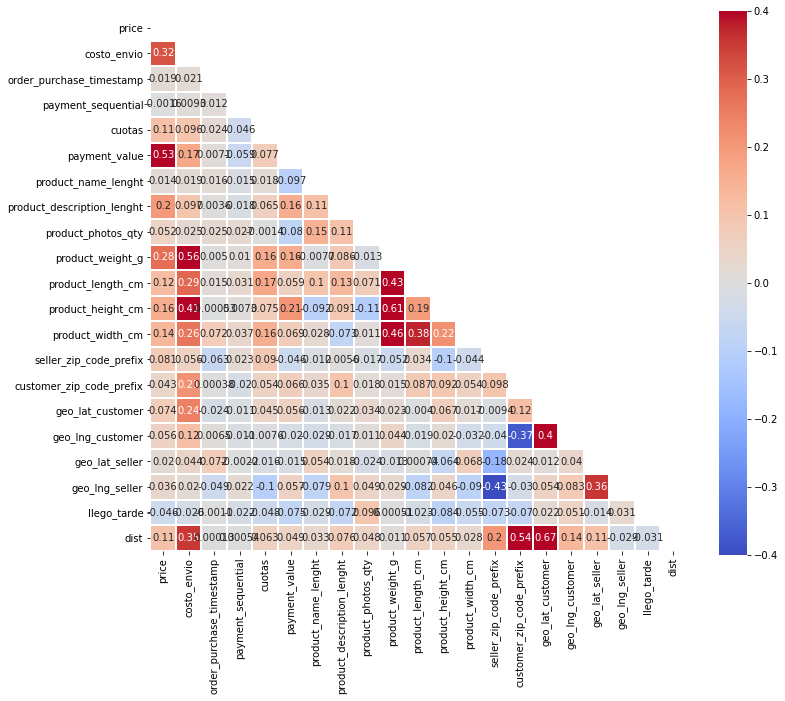

In [556]:
import seaborn as sns
plt.figure(figsize=(12,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix, vmin=-0.4, vmax=0.4, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True,
           xticklabels=df.corr().columns, yticklabels=df.corr().columns)

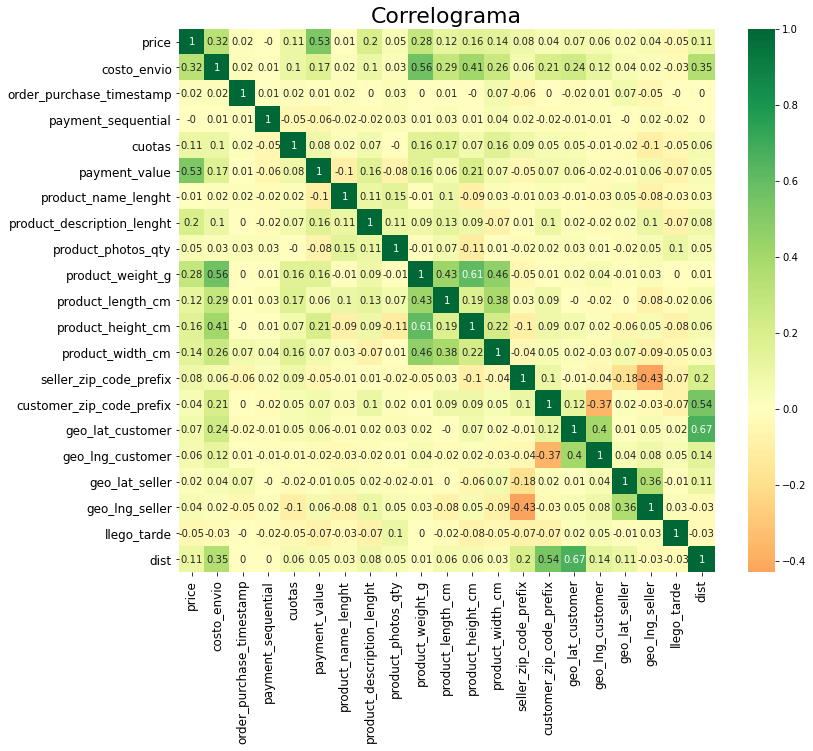

In [557]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlograma', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [558]:
df.columns

Index(['shipping_limit_date', 'price', 'costo_envio', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'cuotas', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geo_lat_customer',
       'geo_lng_customer', 'geo_lat_seller', 'geo_lng_seller', 'llego_tarde',
       'delivered_late', 'dist'],
      dtype='object')

In [559]:
df = df.sample(frac=0.3, random_state=42)

In [560]:
X=df.drop(columns=['llego_tarde'])
y=df['llego_tarde']

# Dividimos los datos en el set de train y el de test:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

display(x_train.shape, x_val.shape, x_test.shape)
#X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=30, stratify=y)
#display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(81634, 33)

(16327, 33)

(10885, 33)

Se procede a dividir el dataset en uno de training, otro de validacion y por ultimo el test para probar los datos con el mejor modelo ganador.

In [561]:
y_train.value_counts()

0    75789
1     5845
Name: llego_tarde, dtype: int64

In [562]:
y_train.mean(), y_test.mean()

(0.07160006859886812, 0.07441433164905834)

In [563]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy='majority');

Por lo tanto vamos a probar con RandomUnderSample para equilibrar con la misma cantidad de observaciones lo datos de training para que el modelo pueda aprender con la misma proporcion de los datos, teniendo en cuenta que la variable =O contiene el 92,6% de los casos y la variable target = 1 el 7,4% de los datos

In [564]:
X_train_us,y_train_us=undersampler.fit_resample(x_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())


Composición del training set:
1    5845
0    5845
Name: llego_tarde, dtype: int64

Composición del test set:
0    10075
1      810
Name: llego_tarde, dtype: int64


In [565]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]
df.dtypes

shipping_limit_date               object
price                            float64
costo_envio                      float64
order_status                      object
order_purchase_timestamp           int64
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
cuotas                             int64
payment_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
customer_zip_cod

In [567]:
df.drop(columns=['geo_lat_customer','geo_lng_customer', 'geo_lat_seller', 'geo_lng_seller', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date'], axis=1)

,price,costo_envio,order_status,payment_sequential,payment_type,cuotas,payment_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,llego_tarde,delivered_late,dist
222599,325.00,10.47,delivered,1,credit_card,6,335.47,beleza_saude,60.0,2644.0,...,22.0,9628,sao bernardo do campo,SP,4107,sao paulo,SP,0,OnTime,11.674070
355225,15.00,7.71,delivered,1,boleto,6,136.26,utilidades_domesticas,55.0,354.0,...,12.0,71825,brasilia,DF,72250,brasilia,DF,0,OnTime,15.078325
61712,207.90,10.20,delivered,1,credit_card,6,218.10,cool_stuff,39.0,525.0,...,11.0,11010,santos,SP,6152,osasco,SP,0,Late,63.611088
151004,27.99,7.46,delivered,1,credit_card,6,35.45,telefonia,59.0,818.0,...,12.0,4160,sao paulo,SP,12225,sao jose dos campos,SP,0,OnTime,97.104013
21463,4.50,11.85,delivered,1,credit_card,6,65.40,sinalizacao_e_seguranca,48.0,373.0,...,15.0,8752,mogi das cruzes,SP,11750,peruibe,SP,0,OnTime,116.310375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165862,134.00,17.19,delivered,1,credit_card,6,604.76,utilidades_domesticas,51.0,539.0,...,29.0,4361,sao paulo,SP,32670,betim,MG,0,Late,484.476677
297044,59.00,13.99,delivered,1,credit_card,6,145.98,cama_mesa_banho,58.0,1290.0,...,30.0,19042,presidente prudente,SP,18150,ibiuna,SP,0,OnTime,456.463444
73993,18.90,16.79,delivered,1,boleto,6,35.69,eletronicos,40.0,672.0,...,12.0,87050,maringa,PR,21620,rio de janeiro,RJ,1,OnTime,872.733868
226089,28.99,15.23,delivered,1,boleto,6,176.88,cool_stuff,56.0,1226.0,...,14.0,1319,sao paulo,SP,23052,rio de janeiro,RJ,0,OnTime,324.164441


Eliminamos variables que no pueden tener ningun vinculo con la satisfaccion del cliente ex-ante

In [573]:
#seleccionamos features numericas
selector_numericas=FeatureSelection(selected_features=['price', 'costo_envio', 'payment_sequential', 'payment_value', 'product_name_lenght', 'product_description_lenght', 'product_weight_g',
                                                       'product_length_cm','product_height_cm','product_width_cm', 'dist']) 
#seleccionamos features categoricas
selector_categoricas=FeatureSelection(selected_features=['product_photos_qty','order_status', 'payment_type', 'product_category_name', 'seller_city','seller_state', 'customer_city', 'customer_state','order_purchase_timestamp','review_creation_date', 'llego_tarde','cuotas','review_comment_title','review_comment_message', 'delivered_late'])

In [574]:
pasos_numericas = [('selector',selector_numericas), ('scaler', StandardScaler())]
pasos_categoricas = [('selector',selector_categoricas), ('encoder', OneHotEncoder(handle_unknown = "ignore"))]
pipe_num=Pipeline(pasos_numericas)
pipe_cat = Pipeline(pasos_categoricas)

In [575]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
pasos = [ ('feature_engineering',FeatureUnion([ ('num', pipe_num), ('cat', pipe_cat) ]) ),
         ('clasificador', None)]
pipe=Pipeline(pasos)

## Probamos con SVM

In [722]:
from sklearn.svm import SVC
#SVM parametros
param_grid_svm= [
     {'feature_engineering__num__scaler': [StandardScaler()],
     'clasificador': [SVC(kernel='rbf', C=10, class_weight='balanced',probability=True, gamma='scale', random_state=42)]}
     
]  
grid_svm=RandomizedSearchCV(pipe, param_grid_svm , n_jobs=-1, cv=folds, scoring='recall')

In [723]:
grid_svm.fit(x_train, y_train)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [724]:
grid_svm.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [725]:
grid_svm.best_score_

0.7674935842600513

In [727]:
print('Accuracy=', accuracy_score(y_val, y_pred_svm))

Accuracy= 0.9769094138543517


In [726]:
y_pred_svm = grid_svm.predict(x_val)
confusion_ = confusion_matrix(y_val, y_pred_svm)
confusion_ 

array([[15094,    98],
       [  279,   856]], dtype=int64)

Si bien los valores de recall, precision y accuracy son buenos, sobre los envios que llegan tarde solo clasifica correctamente el 75,4%, mientras que los pedidos que arriban en hora lo hace casi perfecto (99,5%)

In [728]:
print(f1_score(y_val,y_pred_svm, average='weighted'))

0.9759774486867249


In [729]:
print(recall_score(y_val, y_pred_svm, average='weighted')) 

0.9769094138543517


In [730]:
print(precision_score(y_val, y_pred_svm, average='weighted'))

0.9759718027626813


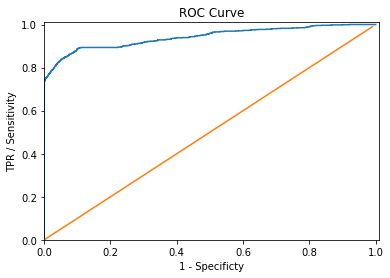

In [731]:
# ROC Curve y AUC
y_pred_svm_proba = grid_svm.predict_proba(x_val)

from sklearn.metrics import roc_curve
fpr_sv,tpr_sv,thr_sv = roc_curve(y_val, y_pred_svm_proba[:,1])

df_sv = pd.DataFrame(dict(fpr=fpr_sv, tpr=tpr_sv, thr = thr_sv))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_sv['fpr'],df_sv['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

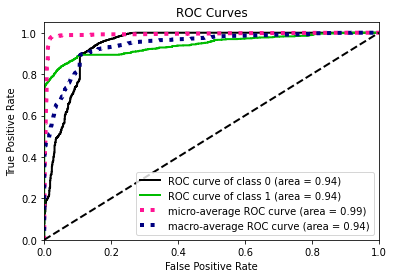

In [732]:
from scikitplot.metrics import plot_roc
plot_roc(y_val,y_pred_svm_proba)

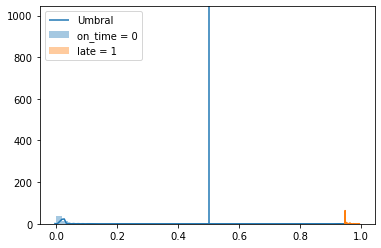

In [733]:
sns.distplot(grid_svm.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(grid_svm.predict_proba(x_train[y_train==1])[:,1])

ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'on_time = 0', 'late = 1'])

## Equilibrando los datos de training con RandomUnderSample

In [734]:
from sklearn.svm import SVC
param_grid_svm_under= [
     {'feature_engineering__num__scaler': [StandardScaler()],
     'clasificador': [SVC(kernel='rbf', probability=True, C=10, gamma='scale', random_state=42)]}
     
]  
grid_svm_under=RandomizedSearchCV(pipe, param_grid_svm_under , n_jobs=-1, cv=folds, scoring='recall')

In [736]:
grid_svm_under.fit(X_train_us, y_train_us)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [737]:
grid_svm_under.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [738]:
grid_svm_under.best_score_

0.8848588537211292

In [739]:
y_pred_svm_under = grid_svm_under.predict(x_val)
confusion_s = confusion_matrix(y_val, y_pred_svm_under)
confusion_s 

array([[13667,  1525],
       [  153,   982]], dtype=int64)

Ahora clasifica con una performance del 90% los envios correctamente, pero mejora significativamente los pedidos tarde (86,5%)

In [740]:
print('Accuracy=', accuracy_score(y_val, y_pred_svm_under))

Accuracy= 0.8972254547681754


In [741]:
print(precision_score(y_val, y_pred_svm_under, average='weighted'))

0.9474118868285204


In [742]:
print(recall_score(y_val, y_pred_svm_under, average='weighted')) 

0.8972254547681754


### Probamos con SGDC con sus diferentes funciones de perdida 


In [743]:
from sklearn.linear_model import SGDClassifier
param_grid_sgd_huber= [
    { 'feature_engineering__num__scaler': [StandardScaler()],
     'clasificador': [SGDClassifier(loss='modified_huber', class_weight='balanced')]}
]  
grid_sgd_huber=RandomizedSearchCV(pipe, param_grid_sgd_huber , n_jobs=-1, cv=folds, scoring='recall')

In [744]:
grid_sgd_huber.fit(x_train, y_train)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [745]:
grid_sgd_huber.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [746]:
grid_sgd_huber.best_score_

0.8196749358426005

In [747]:
y_pred_sgd_huber = grid_sgd_huber.predict(x_val)
confusion_h = confusion_matrix(y_val, y_pred_sgd_huber)
confusion_h 

array([[14678,   514],
       [  248,   887]], dtype=int64)

In [581]:
print('Accuracy=', accuracy_score(y_val, y_pred_sgd_huber))

Accuracy= 0.9354443559747657


In [748]:
grid_sgd_huber_under=RandomizedSearchCV(pipe, param_grid_sgd_huber , n_jobs=-1, cv=folds, scoring='recall')

In [749]:
grid_sgd_huber_under.fit(X_train_us, y_train_us)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [750]:
grid_sgd_huber_under.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [751]:
grid_sgd_huber_under.best_score_

0.8655260906757913

In [752]:
y_pred_sgd_huber_under = grid_sgd_huber_under.predict(x_val)
confusion_sg = confusion_matrix(y_val, y_pred_sgd_huber)
confusion_sg

array([[14678,   514],
       [  248,   887]], dtype=int64)

Con un 78% clasifica los tardios y 96,6% los que llegan en hora

In [753]:
print('Accuracy=', accuracy_score(y_val, y_pred_sgd_huber_under))

Accuracy= 0.9057389600048998


In [754]:
print(precision_score(y_val, y_pred_sgd_huber_under, average='weighted'))

0.9434569853413068


In [755]:
param_grid_sgd_hinge= [
    { 'feature_engineering__num__scaler': [StandardScaler()],
     'clasificador': [SGDClassifier(loss='hinge', class_weight='balanced')]}
]  
grid_sgd_hinge=RandomizedSearchCV(pipe, param_grid_sgd_hinge , n_jobs=-1, cv=folds, scoring='recall')

In [756]:
grid_sgd_hinge.fit(x_train, y_train)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [757]:
grid_sgd_hinge.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [758]:
grid_sgd_hinge.best_score_

0.8508126603934987

In [759]:
y_pred_sgd_hinge = grid_sgd_hinge.predict(x_val)
confusion_sgh = confusion_matrix(y_val, y_pred_sgd_hinge)
confusion_sgh 

array([[13974,  1218],
       [  165,   970]], dtype=int64)

Con 85,46% clasifica correctamente los pedidos tarde y 89,0% los pedidos on time

In [760]:
print('Accuracy=', accuracy_score(y_val,  y_pred_sgd_hinge))

Accuracy= 0.9152936853065474


In [761]:
grid_sgd_hinge_under=RandomizedSearchCV(pipe, param_grid_sgd_hinge , n_jobs=-1, cv=folds, scoring='recall')

In [762]:
grid_sgd_hinge_under.fit(X_train_us, y_train_us)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [763]:
grid_sgd_hinge_under.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [764]:
grid_sgd_hinge_under.best_score_

0.8624465355004277

In [765]:
y_pred_sgd_hinge_under = grid_sgd_hinge_under.predict(x_val)
confusion_un = confusion_matrix(y_val, y_pred_sgd_hinge_under)
confusion_un

array([[13563,  1629],
       [  172,   963]], dtype=int64)

Mejora con un 84,8% la clasificacion de los envios tarde, pero cae al 90,0% la clasificacion de los envios on time

In [766]:
print('Accuracy=', accuracy_score(y_val,  y_pred_sgd_hinge_under))

Accuracy= 0.8896919213572609


In [767]:
print(precision_score(y_val,y_pred_sgd_hinge_under, average='weighted'))

0.9446584417209528


In [768]:
param_grid_sgd_per= [
    { 'feature_engineering__num__scaler': [StandardScaler()],
        'clasificador': [SGDClassifier(loss='perceptron',class_weight='balanced')]}]  
grid_sgd_per=RandomizedSearchCV(pipe, param_grid_sgd_per , n_jobs=-1, cv=folds, scoring='recall')

In [769]:
grid_sgd_per.fit(x_train, y_train)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [770]:
grid_sgd_per.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [771]:
grid_sgd_per.best_score_

0.7994867408041061

In [772]:
y_pred_sgd_per = grid_sgd_per.predict(x_val)
confusion_per = confusion_matrix(y_val, y_pred_sgd_per)
confusion_per 

array([[14239,   953],
       [  228,   907]], dtype=int64)

con un 80% predice que llega tarde y con 93,7% que arriba en hora

In [773]:
print('Accuracy=', accuracy_score(y_val,  y_pred_sgd_per))

Accuracy= 0.9276658296073987


In [774]:
grid_sgd_per_under=RandomizedSearchCV(pipe, param_grid_sgd_per , n_jobs=-1, cv=folds, scoring='recall')

In [775]:
grid_sgd_per_under.fit(X_train_us, y_train_us)

C:\Users\Emiliano\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [776]:
grid_sgd_per_under.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [777]:
grid_sgd_per_under.best_score_

0.8899914456800685

In [778]:
y_pred_sgd_per_under = grid_sgd_per_under.predict(x_val)
confusion_sp = confusion_matrix(y_val, y_pred_sgd_per_under)
confusion_sp 

array([[13166,  2026],
       [  168,   967]], dtype=int64)

Mejora con un 85,2% de pedidos tarde y pero con un 86,66% lo pedidos on time

In [779]:
print('Accuracy=', accuracy_score(y_val,  y_pred_sgd_per_under))

Accuracy= 0.8656213633858026


In [780]:
print(precision_score(y_val,y_pred_sgd_per_under, average='weighted'))

0.9412197186516411


##  Regresión Logística

In [609]:
#Regresion logística
param_grid_logistic= [
    {'clasificador__penalty': ['l1', 'l2'], 'clasificador__C': np.arange(0.01,10, 0.02),
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador__class_weight':['balanced', None ],
     'clasificador': [LogisticRegression(solver= 'liblinear',class_weight='balanced', max_iter=3500)]}
]
grid_logistic=RandomizedSearchCV(pipe, param_grid_logistic, n_jobs=-1, cv=folds, scoring='recall')

In [610]:
grid_logistic.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [611]:
grid_logistic.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [612]:
grid_logistic.best_score_

0.8234388366124893

In [613]:
y_pred_logistic = grid_logistic.predict(x_val)
confusion_logistic = confusion_matrix(y_val, y_pred_logistic)
confusion_logistic 

array([[14420,   772],
       [  205,   930]], dtype=int64)

Clasifica el 82,0% de los pedidos tarde  y 95,0% los pedidos en hora

In [614]:
print('Accuracy=', accuracy_score(y_val, y_pred_logistic))

Accuracy= 0.9401604703864764


In [615]:
print(f1_score(y_val,y_pred_logistic, average='weighted'))

0.9455712506649604


In [616]:
print(recall_score(y_val, y_pred_logistic, average='weighted')) 

0.9401604703864764


In [617]:
print(precision_score(y_val, y_pred_logistic, average='weighted'))

0.9554256413519144


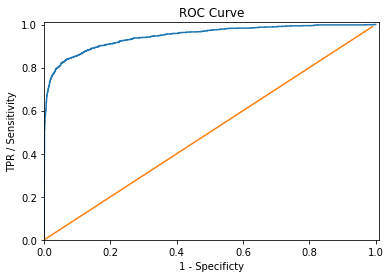

In [618]:
# ROC Curve y AUC
y_pred_logistic_proba = grid_logistic.predict_proba(x_val)

from sklearn.metrics import roc_curve
fpr_lg,tpr_lg,thr_lg = roc_curve(y_val, y_pred_logistic_proba[:,1])

df_lg = pd.DataFrame(dict(fpr=fpr_lg, tpr=tpr_lg, thr = thr_lg))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

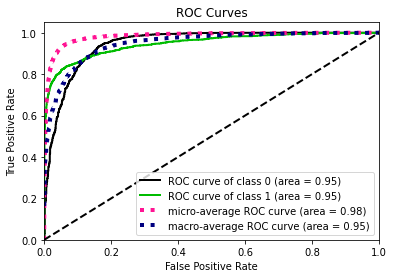

In [619]:
from scikitplot.metrics import plot_roc
plot_roc(y_val,y_pred_logistic_proba)

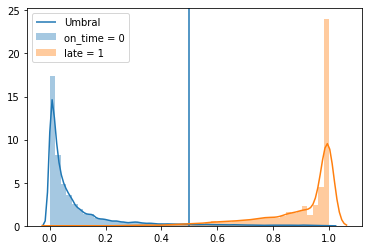

In [620]:
sns.distplot(grid_logistic.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(grid_logistic.predict_proba(x_train[y_train==1])[:,1])

ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'on_time = 0', 'late = 1'])

In [621]:
grid_logistic_under=RandomizedSearchCV(pipe, param_grid_logistic, n_jobs=-1, cv=folds, scoring='recall')

In [622]:
grid_logistic_under.fit(X_train_us, y_train_us)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [623]:
grid_logistic_under.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [624]:
grid_logistic_under.best_score_

0.8785286569717707

In [625]:
y_pred_logistic_under = grid_logistic_under.predict(x_val)
confusion_under = confusion_matrix(y_val, y_pred_logistic_under)
confusion_under 

array([[13549,  1643],
       [  166,   969]], dtype=int64)

Mejora al 85,3% los que clasifica como tarde y 89,2% los que clasifica en hora

In [626]:
print('Accuracy=', accuracy_score(y_val, y_pred_logistic_under))

Accuracy= 0.889201935444356


In [627]:
print(recall_score(y_val, y_pred_logistic_under, average='weighted')) 

0.889201935444356


In [628]:
print(precision_score(y_val, y_pred_logistic_under, average='weighted'))

0.9450104416739744


##   AdaBoost

In [629]:
#Probamos AdaBoost y GradientBoosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [630]:
dt = DecisionTreeClassifier(random_state=42)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500,random_state=42)

#AdaBoost
param_grid_ada= [
    {'clasificador__learning_rate': np.arange(0.6, 1, 0.02), 'clasificador__n_estimators': np.arange(50,100, 2),
     "clasificador__base_estimator__max_depth": [1, 2, 3, 5],
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [AdaBoostClassifier(base_estimator=dt, n_estimators=np.arange(50, 500, 2),random_state=42)]}
]
abc=RandomizedSearchCV(pipe, param_grid_ada, cv=folds, n_jobs=-1, scoring='recall')

In [631]:
abc.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [632]:
abc.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [633]:
abc.best_score_

0.7255774165953807

In [634]:
y_pred_abc = abc.predict(x_val)
confusion_abc = confusion_matrix(y_val, y_pred_abc)
confusion_abc

array([[15060,   132],
       [  339,   796]], dtype=int64)

In [635]:
print('Accuracy=', accuracy_score(y_val, y_pred_abc))

Accuracy= 0.9711520793777179


In [636]:
print(f1_score(y_val,y_pred_abc, average='weighted'))

0.969802391684167


In [637]:
print(recall_score(y_val, y_pred_abc, average='weighted')) 

0.9711520793777179


In [638]:
print(precision_score(y_val, y_pred_abc, average='weighted'))

0.9696277955964056


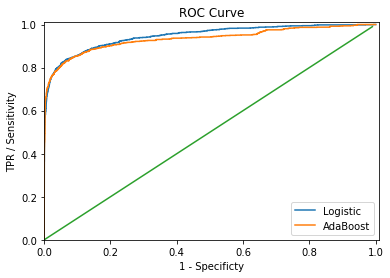

In [639]:
y_pred_abc_proba = abc.predict_proba(x_val)

fpr_abc,tpr_abc,thr_abc = roc_curve(y_val, y_pred_abc_proba[:,1])

df_abc = pd.DataFrame(dict(fpr=fpr_abc, tpr=tpr_abc, thr = thr_abc))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.legend(['Logistic','AdaBoost'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

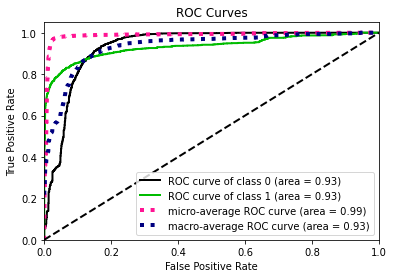

In [640]:
plot_roc(y_val,y_pred_abc_proba)

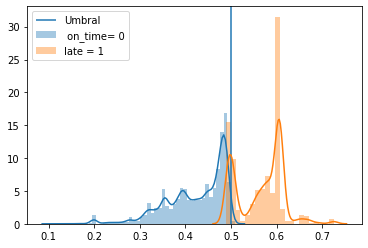

In [642]:
sns.distplot(abc.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(abc.predict_proba(x_train[y_train==1])[:,1])

ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', ' on_time= 0', 'late = 1'])

In [643]:
abc_under=RandomizedSearchCV(pipe, param_grid_ada, cv=folds, n_jobs=-1, scoring='recall')

In [644]:
abc_under.fit(X_train_us, y_train_us)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [645]:
abc_under.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [646]:
abc_under.best_score_

0.8718562874251499

In [647]:
y_pred_abc_under = abc_under.predict(x_val)
confusion_abcu = confusion_matrix(y_val, y_pred_abc_under)
confusion_abcu

array([[13372,  1820],
       [  175,   960]], dtype=int64)

Mejora con un 87,4% los pedidos tarde y 88,0% los pedidos en hora

In [648]:
print('Accuracy=', accuracy_score(y_val, y_pred_abc_under))

Accuracy= 0.8778097629693147


In [649]:
print(precision_score(y_val, y_pred_abc_under, average='weighted'))

0.9424690606830289


##  GradientBoost

In [650]:
#GradientBoost
params_gb = [
    {'clasificador__learning_rate': np.arange(0.01, 1, 0.02), 'clasificador__n_estimators': np.arange(50,100, 2),
     "clasificador__max_depth": [1, 2, 3, 5], 'clasificador__loss': ['deviance', 'exponential'], 
     'clasificador__max_features': ['auto', 'sqrt', 'log2'],
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [GradientBoostingClassifier()]}
]

gb = RandomizedSearchCV(pipe, params_gb, cv=folds, n_jobs=-1, scoring='recall')

In [651]:
gb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [652]:
gb.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [653]:
gb.best_score_

0.5023096663815227

In [654]:
y_pred_gb = gb.predict(x_val)
confusion_gb = confusion_matrix(y_val, y_pred_gb)
confusion_gb 

array([[15165,    27],
       [  589,   546]], dtype=int64)

In [655]:
print('Accuracy=', accuracy_score(y_val, y_pred_gb))

Accuracy= 0.9622710847063147


In [656]:
print(f1_score(y_val,y_pred_gb, average='weighted'))

0.9564065182293836


In [657]:
print(recall_score(y_val, y_pred_gb, average='weighted'))

0.9622710847063147


In [658]:
print(precision_score(y_val, y_pred_gb, average='weighted'))

0.9619360570944308


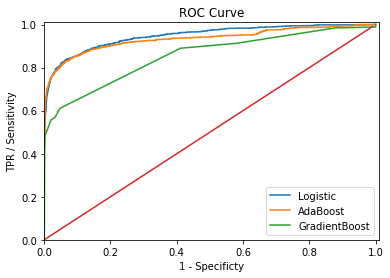

In [659]:
y_pred_gb_proba = gb.predict_proba(x_val)

fpr_gb,tpr_gb,thr_gb = roc_curve(y_val, y_pred_gb_proba[:,1])

df_gb = pd.DataFrame(dict(fpr=fpr_gb, tpr=tpr_gb, thr = thr_gb))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.plot(df_gb['fpr'],df_gb['tpr'])
plt.legend(['Logistic','AdaBoost', 'GradientBoost'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

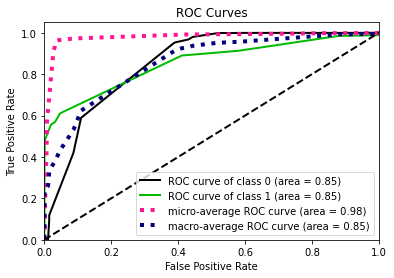

In [660]:
plot_roc(y_val,y_pred_gb_proba)

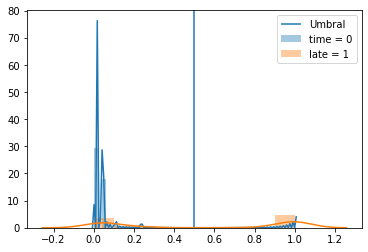

In [661]:
sns.distplot(gb.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(gb.predict_proba(x_train[y_train==1])[:,1])

ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'time = 0', 'late = 1'])

In [662]:
gb_under = RandomizedSearchCV(pipe, params_gb, cv=folds, n_jobs=-1, scoring='recall')

In [663]:
gb_under.fit(X_train_us, y_train_us)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [664]:
gb_under.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [665]:
gb_under.best_score_

0.8427715996578271

In [666]:
y_pred_gb_under = gb_under.predict(x_val)
confusion_y = confusion_matrix(y_val, y_pred_gb_under)
confusion_y

array([[13667,  1525],
       [  186,   949]], dtype=int64)

Mejora con un 83,6 % los envios tardes y 90% los envios en hora

In [667]:
print('Accuracy=', accuracy_score(y_val, y_pred_gb_under))

Accuracy= 0.8952042628774423


In [668]:
print(precision_score(y_val, y_pred_gb_under, average='weighted'))

0.9446558182396503


##  XGBClassifier

In [669]:
#XGBClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_params = {  
    "clasificador__n_estimators": np.arange(50,100, 2),
    "clasificador__max_depth": [1,2,3,4], 
    'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
    'clasificador__learning_rate': np.arange(0.01, 1, 0.02),
    'clasificador': [XGBClassifier()]
}
xgb = RandomizedSearchCV(pipe, xgb_params, cv=folds, n_jobs=-1, scoring="recall")

In [670]:
xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [671]:
xgb.best_score_

0.6284003421727973

In [672]:
y_pred_xgb = xgb.predict(x_val)
confusion_x = confusion_matrix(y_val, y_pred_xgb)
confusion_x 

array([[15162,    30],
       [  454,   681]], dtype=int64)

In [673]:
print('Accuracy=', accuracy_score(y_val, y_pred_xgb))

Accuracy= 0.9703558522692473


In [674]:
print(f1_score(y_val,y_pred_xgb, average='weighted'))

0.9671554234188497


In [675]:
print(recall_score(y_val,y_pred_xgb, average='weighted'))

0.9703558522692473


In [676]:
print(precision_score(y_val,y_pred_xgb, average='weighted'))

0.9700151006862036


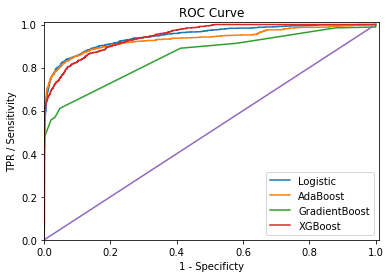

In [677]:
y_pred_xgb_proba = xgb.predict_proba(x_val)

fpr_xgb,tpr_xgb,thr_xgb = roc_curve(y_val, y_pred_xgb_proba[:,1])

df_xgb = pd.DataFrame(dict(fpr=fpr_xgb, tpr=tpr_xgb, thr = thr_xgb))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.plot(df_gb['fpr'],df_gb['tpr'])
plt.plot(df_xgb['fpr'],df_xgb['tpr'])
plt.legend(['Logistic','AdaBoost', 'GradientBoost', 'XGBoost'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

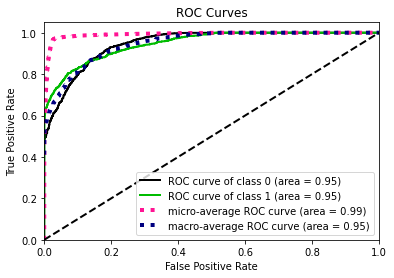

In [678]:
plot_roc(y_val,y_pred_xgb_proba)

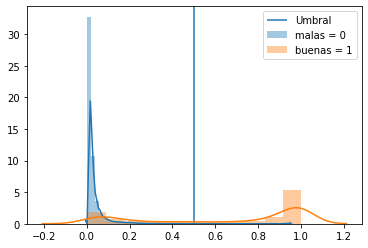

In [679]:
sns.distplot(xgb.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(xgb.predict_proba(x_train[y_train==1])[:,1])

ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'malas = 0', 'buenas = 1'])

In [680]:
xgb_under = RandomizedSearchCV(pipe, xgb_params, cv=folds, n_jobs=-1, scoring="recall")

In [681]:
xgb_under.fit(X_train_us, y_train_us)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [682]:
xgb_under.best_score_

0.8735671514114628

In [683]:
y_pred_xgb_under = xgb_under.predict(x_val)
confusion_xc = confusion_matrix(y_val, y_pred_xgb_under)
confusion_xc 

array([[13374,  1818],
       [  148,   987]], dtype=int64)

Clasifica el 87 % como tarde y 88% como envios en hora

In [684]:
print('Accuracy=', accuracy_score(y_val, y_pred_xgb_under))

Accuracy= 0.8795859619035953


In [685]:
print(precision_score(y_val,y_pred_xgb_under, average='weighted'))

0.9447599663356175


# Probamos CATBOOST

In [686]:
from catboost import CatBoostClassifier

In [687]:
params_catb = {
    'clasificador__depth': [6,8,10],
    'clasificador__learning_rate' : [0.01, 0.05, 0.1],
    'clasificador__iterations' : [30, 50, 100],
    'clasificador': [CatBoostClassifier()]
}

In [688]:
cat=RandomizedSearchCV(pipe, params_catb, cv=folds,n_jobs=-1, scoring='recall')

In [689]:
cat.fit(x_train, y_train)

0:	learn: 0.5642305	total: 176ms	remaining: 17.5s
1:	learn: 0.4616877	total: 261ms	remaining: 12.8s
2:	learn: 0.3844257	total: 352ms	remaining: 11.4s
3:	learn: 0.3344414	total: 445ms	remaining: 10.7s
4:	learn: 0.2917255	total: 534ms	remaining: 10.1s
5:	learn: 0.2636532	total: 617ms	remaining: 9.66s
6:	learn: 0.2397498	total: 705ms	remaining: 9.37s
7:	learn: 0.2242158	total: 796ms	remaining: 9.15s
8:	learn: 0.2109708	total: 897ms	remaining: 9.07s
9:	learn: 0.1999660	total: 984ms	remaining: 8.86s
10:	learn: 0.1922604	total: 1.07s	remaining: 8.7s
11:	learn: 0.1847669	total: 1.17s	remaining: 8.57s
12:	learn: 0.1797925	total: 1.25s	remaining: 8.35s
13:	learn: 0.1757667	total: 1.33s	remaining: 8.18s
14:	learn: 0.1704061	total: 1.42s	remaining: 8.06s
15:	learn: 0.1671304	total: 1.5s	remaining: 7.9s
16:	learn: 0.1643312	total: 1.59s	remaining: 7.76s
17:	learn: 0.1621899	total: 1.67s	remaining: 7.63s
18:	learn: 0.1599349	total: 1.75s	remaining: 7.47s
19:	learn: 0.1586196	total: 1.85s	remaining:

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [690]:
cat.best_score_

0.539606501283148

In [691]:
y_pred_cat = cat.predict(x_val)
confusion_cat = confusion_matrix(y_val, y_pred_cat)
confusion_cat

array([[15190,     2],
       [  543,   592]], dtype=int64)

99,9% de efectividad para clasificar los envios en hora¡¡¡¡ pero muy baja performance en los envios tarde(52,%)

In [692]:
print('Accuracy=', accuracy_score(y_val, y_pred_cat))

Accuracy= 0.9666197096833467


In [693]:
print(f1_score(y_val,y_pred_cat, average='weighted'))

0.9616893791878524


In [694]:
print(recall_score(y_val,y_pred_cat, average='weighted'))

0.9666197096833467


In [695]:
print(precision_score(y_val,y_pred_cat, average='weighted'))

0.9676517562249954


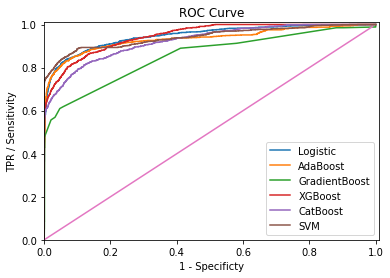

In [781]:
y_pred_cat_proba = cat.predict_proba(x_val)

fpr_cat,tpr_cat,thr_cat = roc_curve(y_val, y_pred_cat_proba[:,1])

df_cat = pd.DataFrame(dict(fpr=fpr_cat, tpr=tpr_cat, thr = thr_cat))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.plot(df_gb['fpr'],df_gb['tpr'])
plt.plot(df_xgb['fpr'],df_xgb['tpr'])
plt.plot(df_cat['fpr'],df_cat['tpr'])
plt.plot(df_sv['fpr'],df_sv['tpr'])
plt.legend(['Logistic','AdaBoost', 'GradientBoost', 'XGBoost','CatBoost', 'SVM'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [697]:
cat_under=RandomizedSearchCV(pipe, params_catb, cv=folds,n_jobs=-1, scoring='recall')

In [698]:
cat_under.fit(X_train_us, y_train_us)

0:	learn: 0.6047061	total: 85.3ms	remaining: 8.44s
1:	learn: 0.5456423	total: 161ms	remaining: 7.9s
2:	learn: 0.5061054	total: 231ms	remaining: 7.46s
3:	learn: 0.4810337	total: 305ms	remaining: 7.31s
4:	learn: 0.4641162	total: 380ms	remaining: 7.22s
5:	learn: 0.4495246	total: 468ms	remaining: 7.33s
6:	learn: 0.4344162	total: 548ms	remaining: 7.28s
7:	learn: 0.4259666	total: 628ms	remaining: 7.22s
8:	learn: 0.4139669	total: 698ms	remaining: 7.06s
9:	learn: 0.4034353	total: 770ms	remaining: 6.93s
10:	learn: 0.3977260	total: 850ms	remaining: 6.87s
11:	learn: 0.3945214	total: 925ms	remaining: 6.78s
12:	learn: 0.3900620	total: 995ms	remaining: 6.66s
13:	learn: 0.3855856	total: 1.06s	remaining: 6.54s
14:	learn: 0.3806632	total: 1.14s	remaining: 6.45s
15:	learn: 0.3755292	total: 1.22s	remaining: 6.41s
16:	learn: 0.3727496	total: 1.29s	remaining: 6.31s
17:	learn: 0.3698177	total: 1.37s	remaining: 6.26s
18:	learn: 0.3650695	total: 1.45s	remaining: 6.2s
19:	learn: 0.3616547	total: 1.53s	remainin

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [699]:
cat_under.best_score_

0.8340461933276305

In [701]:
y_pred_cat_under = cat_under.predict(x_val)
confusion_cat2 = confusion_matrix(y_val, y_pred_cat_under)
confusion_cat2

array([[13697,  1495],
       [  199,   936]], dtype=int64)

Fuerte mejora al 82,4% los envios tarde pero baja al 90% la performance de los envios en hora. Sin embargo la tasa de mejora es importante

In [702]:
print('Accuracy=', accuracy_score(y_val, y_pred_cat_under))

Accuracy= 0.8962454829423654


In [703]:
print(precision_score(y_val,y_pred_cat_under, average='weighted'))

0.9439239151161483


# Probamos LIGHTGBM

In [704]:
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [705]:
params_lgb = {  
    "clasificador__n_estimators": [50,100,500],      
    "clasificador__max_depth": [1,2,3,4],            
    "clasificador__learning_rate": [0.01, 0.1],
    'clasificador': [LGBMClassifier()]
}

In [706]:
grid_lgb=RandomizedSearchCV(pipe, params_lgb, cv=folds,n_jobs=-1, scoring='recall')

In [707]:
grid_lgb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [708]:
grid_lgb.best_score_

0.5704020530367836

In [709]:
y_pred_lgb = grid_lgb.predict(x_val)
confusion_lg = confusion_matrix(y_val, y_pred_lgb)
confusion_lg

array([[15179,    13],
       [  518,   617]], dtype=int64)

54,5% los clasifica como tardio y 99,9% en hora

In [710]:
print('Accuracy=', accuracy_score(y_val, y_pred_lgb))

Accuracy= 0.9674771850309304


In [711]:
print(f1_score(y_val,y_pred_lgb, average='weighted'))

0.9630903432131028


In [712]:
print(recall_score(y_val,y_pred_lgb, average='weighted'))

0.9674771850309304


In [713]:
print(precision_score(y_val,y_pred_lgb, average='weighted'))

0.9678596394259579


In [714]:
grid_lgb_under=RandomizedSearchCV(pipe, params_lgb, cv=folds,n_jobs=-1, scoring='recall')

In [715]:
grid_lgb_under.fit(X_train_us, y_train_us)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [716]:
grid_lgb_under.best_score_

0.8496150556030795

In [717]:
y_pred_lgb_under = grid_lgb_under.predict(x_val)
confusion_lu = confusion_matrix(y_val, y_pred_lgb_under)
confusion_lu

array([[13579,  1613],
       [  184,   951]], dtype=int64)

mejora con un 83,7% de efectividad para los envios tardios y 89,3% para los envios en hora

In [718]:
print('Accuracy=', accuracy_score(y_val, y_pred_lgb_under))

Accuracy= 0.8899369143137135


In [719]:
print(precision_score(y_val,y_pred_lgb_under, average='weighted'))

0.9438275515028336


In [720]:
print(recall_score(y_val,y_pred_lgb_under, average='weighted'))

0.8899369143137135


# Resultados del best Score por CV
svm: 0.767            under:0.884

sgdc mod huber:0.819  under:0.865

### sgdc hinge :0.85      under:0.862

sgdc perceptron:0.799 under:0.889

logistica:0.823       under:0.878

AdaBoost:0.722        under:0.871

GradientBoost:0.502   under:0.842

XGBoost:0.628         under:0.873

CatBoost:0.539        under:0.834

LightGBM :0.570       under:0.849

In [783]:
y_pred_sgd_hinge_test = grid_sgd_hinge.predict(x_test)
confusion_logistic = confusion_matrix(y_test, y_pred_sgd_hinge_test)
confusion_logistic

array([[9280,  795],
       [ 106,  704]], dtype=int64)

## Predice con un 90,6% los envios que arribaran tarde y con un 94,7% los envios sin demora

In [784]:
union = grid_sgd_hinge.best_estimator_.steps[0][1]
nums = union.transformer_list[0][1].steps[0][1].selected_features
cats = (union.transformer_list[1][1]
        .steps[-1][1].get_feature_names(
            union.transformer_list[1][1].steps[0][1].selected_features
        ))
columnas = list(nums) + list(cats)
importancias = xgb.best_estimator_.steps[-1][1].feature_importances_
pd.DataFrame(zip(columnas, importancias), columns=["columna", "importancia"]).sort_values("importancia", ascending=False)[0:20]

,columna,importancia
6806,customer_zip_code_prefix_5882,0.338490
8098,customer_zip_code_prefix_13175,0.019804
12549,customer_zip_code_prefix_67030,0.018881
4056,seller_zip_code_prefix_14092,0.018616
7384,customer_zip_code_prefix_8527,0.017667
6750,customer_zip_code_prefix_5786,0.017639
3455,seller_zip_code_prefix_3813,0.017241
10728,customer_zip_code_prefix_36570,0.016091
8892,customer_zip_code_prefix_18207,0.015886
14158,customer_zip_code_prefix_88058,0.014761


# Conclusiones
Podemos concluir que existe un problema importante en la provision de los productos cuando son ordenados por clientes con codigo de prefijo 5882 (33% de importancia). Deberia investigarse si existen sellers cercanos, cuantificarlos y ver su 
performance.
A su vez se observa problemas en una serie de codigos_prefijos relacionados con clientes(pocos vendedores en la zona?). 

Tambien dos ciudades en particular aparecen con problemas (Santa Ines y Vitoria). 

Por otro lado, la variable incorporada DELIVERED LATE resulto significativa. 

Ademas se observa que un tipo de producto en particular (herramientas de Jardin) tiene problemas de envio.